In [1]:
import xarray as xr
import double_slit as ds
from double_slit import ds_para
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=xr.open_dataset("y_data.nc")
data

<xarray.Dataset>
Dimensions:                (dim_1: 450, time: 7803)
Coordinates:
  * time                   (time) float64 1.634e+09 1.634e+09 ... 1.634e+09
Dimensions without coordinates: dim_1
Data variables:
    tms_diag_y_projection  (time, dim_1) float64 ...

In [3]:
"""
Block for analyzing the timestamps 
We see that on average between 2 timestamps 3.6s pass. 
"""
a=np.array(data.time)[1:]-np.array(data.time)[:-1]
print(np.max(a),np.min(a),np.mean(a))
print(np.array(data.time)[1])
print(np.array(data.time)[2])

43.01044154167175 1.3880164623260498 3.5687937587385026
1633979040.6435566
1633979043.6283965


In [4]:
data.tms_diag_y_projection

<xarray.DataArray 'tms_diag_y_projection' (time: 7803, dim_1: 450)>
[3511350 values with dtype=float64]
Coordinates:
  * time     (time) float64 1.634e+09 1.634e+09 ... 1.634e+09 1.634e+09
Dimensions without coordinates: dim_1
Attributes:
    object:   tms

In [5]:
x0_pred=ds_para(intensity=1000,
                sx=0.07,
                x0=225,
                offset=450,
                a2=1.6,
                a3=0.2,
                phase=3.15)


Regressor = ds.double_slit_reg(x0_pred=x0_pred)

x=np.arange(450)
y=data.tms_diag_y_projection[4,:]
Regressor.fit(x,y)

In [6]:
Regressor.x

ds_para(intensity=2390.8345717461007, sx=0.012738042816677926, x0=206.0289013643262, offset=171.41599809148644, a2=-0.8418428679062707, a3=0.1991244454392781, phase=4.371689233536784e-14)

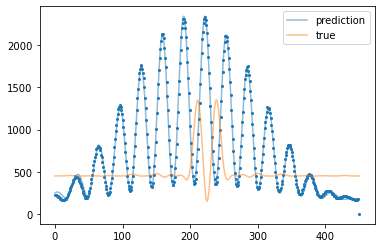

In [7]:
Regressor.plot_result(x,y,true_input=x0_pred)

In [8]:
Regressor.x

ds_para(intensity=2390.8345717461007, sx=0.012738042816677926, x0=206.0289013643262, offset=171.41599809148644, a2=-0.8418428679062707, a3=0.1991244454392781, phase=4.371689233536784e-14)

In [9]:
exact_paras=ds_para(*Regressor.x.to_array().tolist())

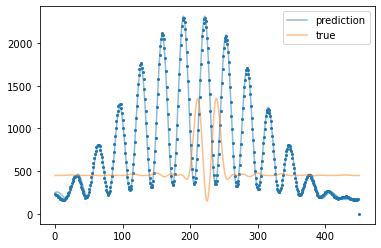

29.373400407928575


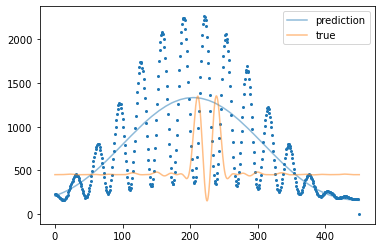

310.18277239441676


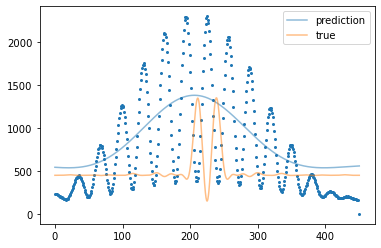

383.1214922742628


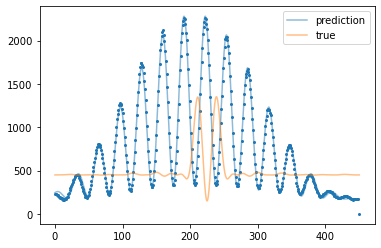

29.795782992939714


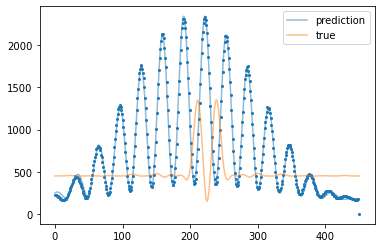

28.51446266698111


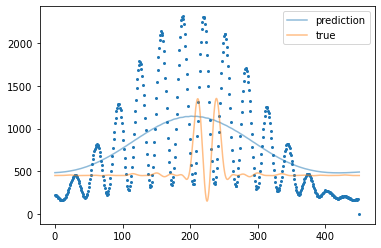

379.6792116819309


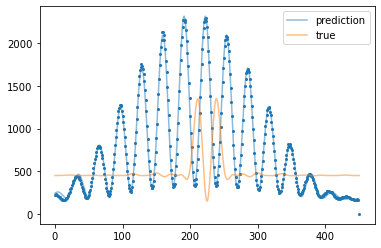

29.077030667592762


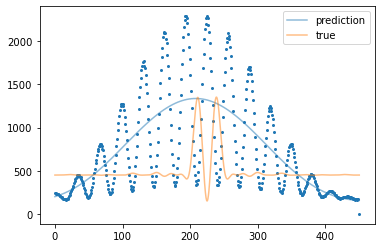

316.66827887733064


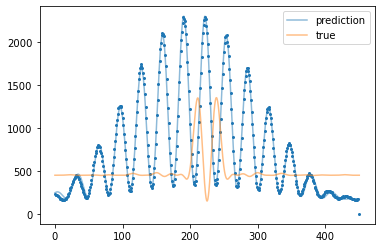

28.83192490671751


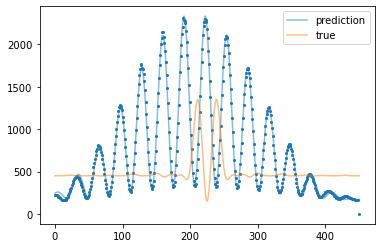

29.608925504820224


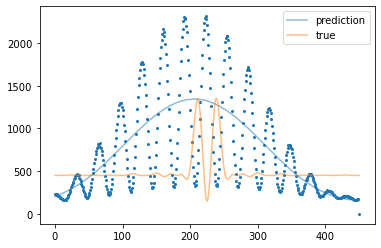

320.38800937475145


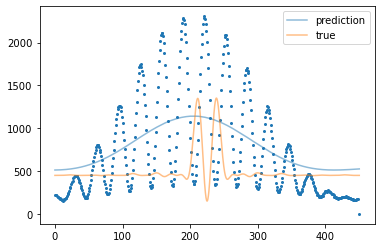

386.9620605278593


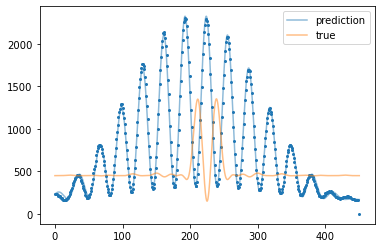

30.208772858941003


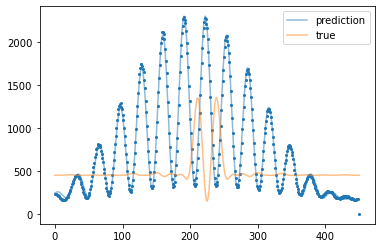

29.73022729012015


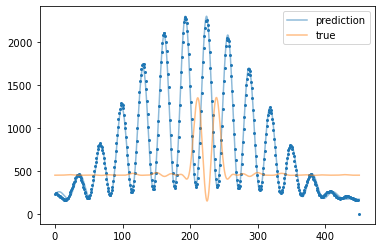

31.019168810346173


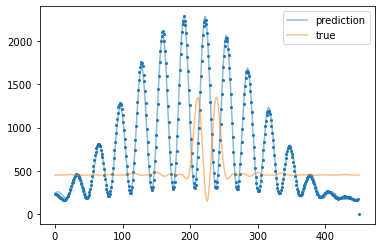

32.50610147191253


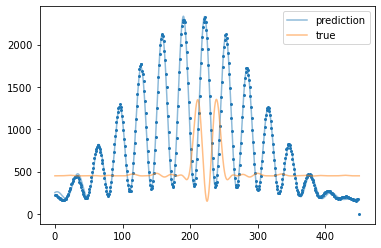

29.03981255873407


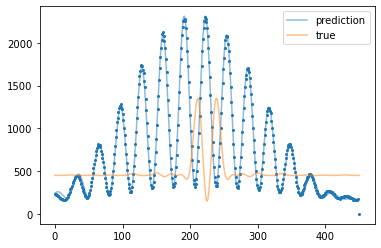

29.181629558864977


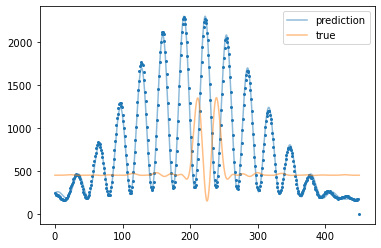

32.79156658438803


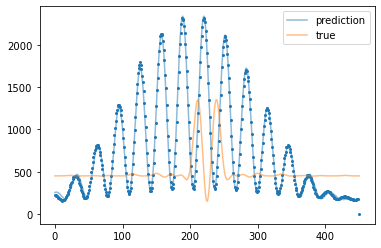

30.651910646383893


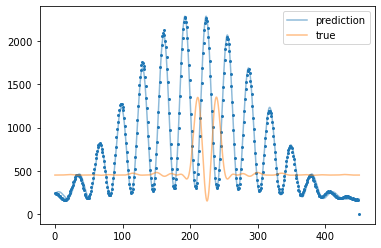

31.892691267605237


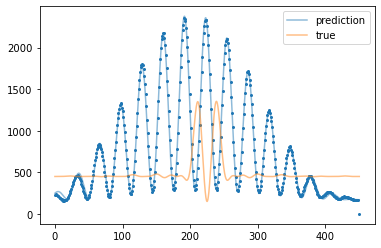

29.476664444795453


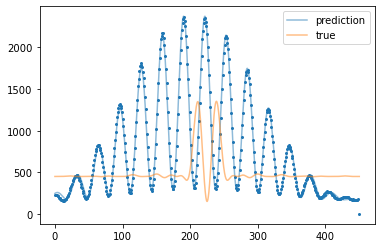

31.140002693437726


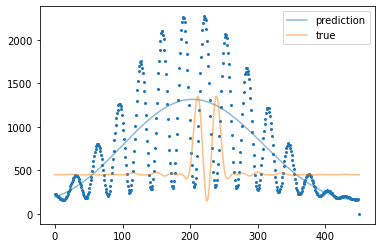

317.44686382582074


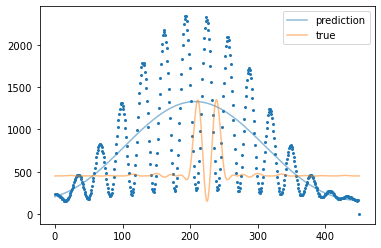

331.10931058622293


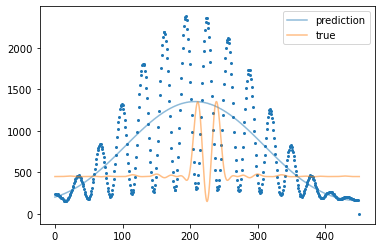

334.8166970971609


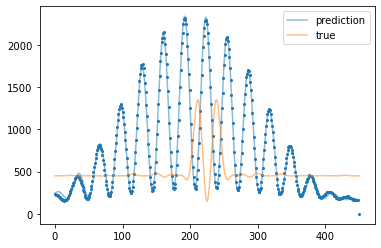

29.06067832445754


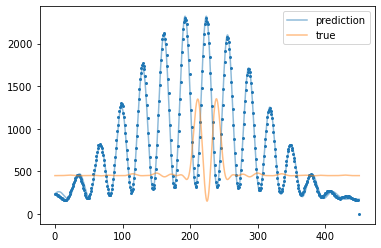

30.661053768728518


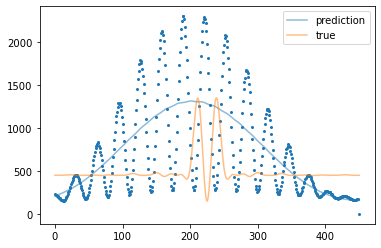

325.98299802536485


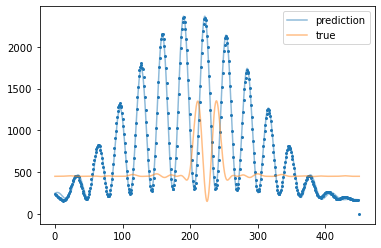

31.628539537596012


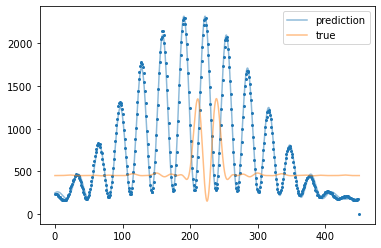

33.47311131198227


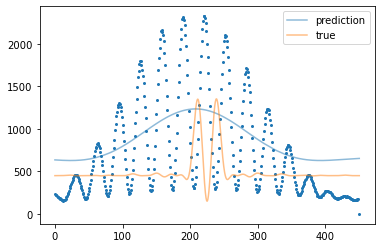

430.5821308281598


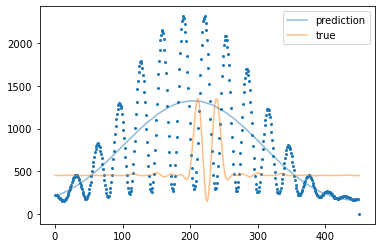

328.2194210308712


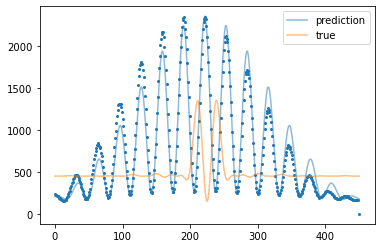

93.49640977530869


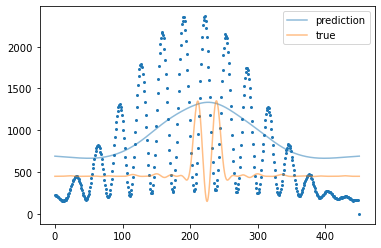

455.6251987988936


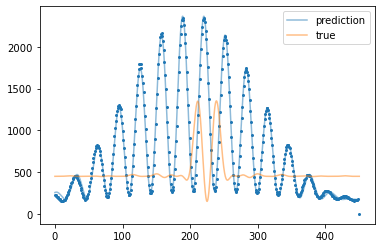

31.785922512356393


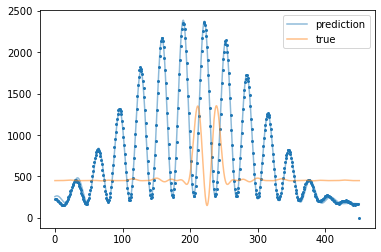

30.428245931507515


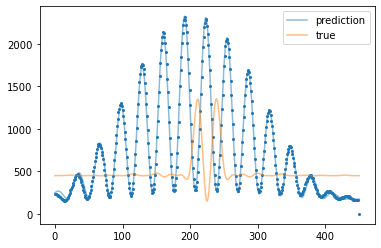

30.253361366811397


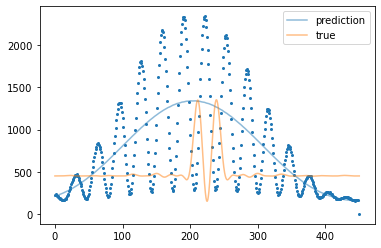

333.81163833264793


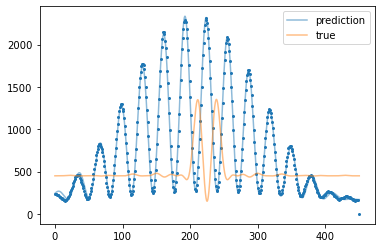

30.473221651867632


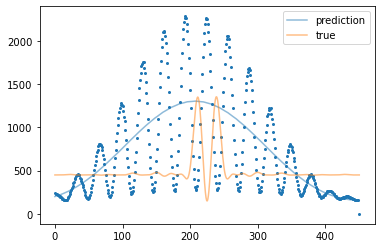

324.3106025396437


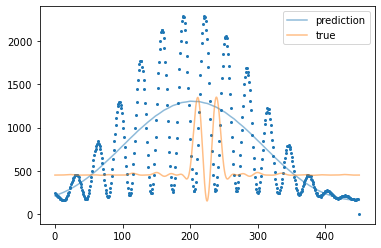

328.4933331549636


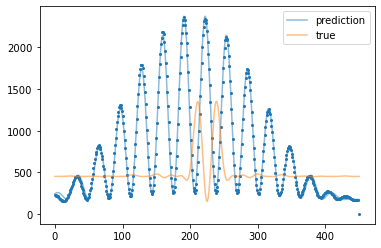

32.100091910564785


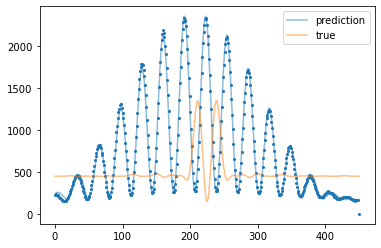

32.93169610892231


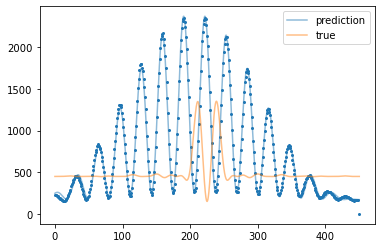

32.6242738958551


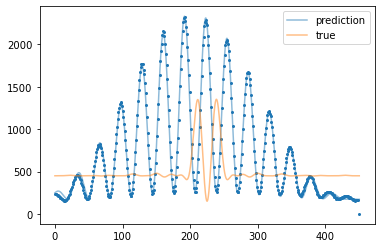

30.661003515770417


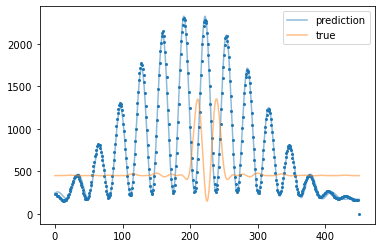

32.76494713586514


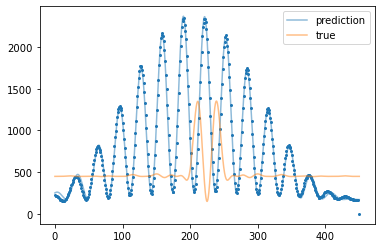

30.53650337456603


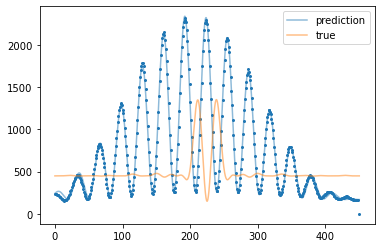

30.055440333325148


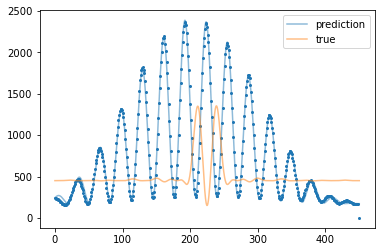

31.5345190908645


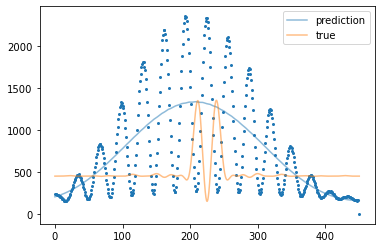

337.36404644578386


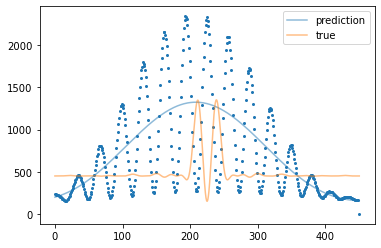

334.16861164796205


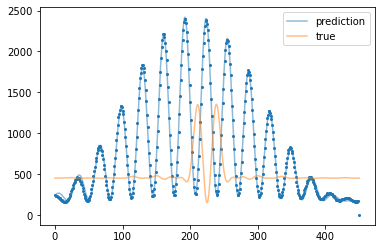

31.889761360446187


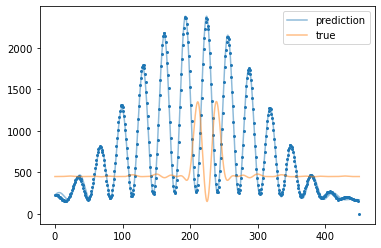

31.412115552130853


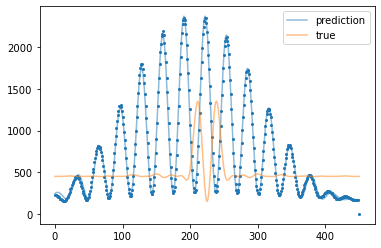

31.51805931661836


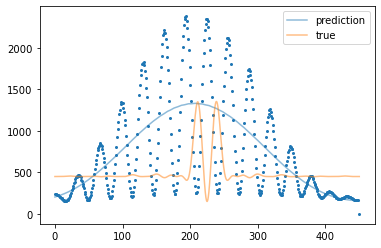

342.33208928659184


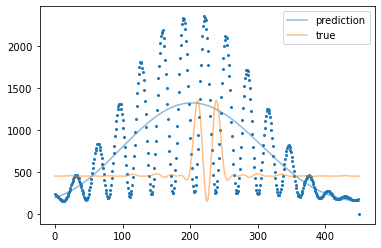

338.51244704498134


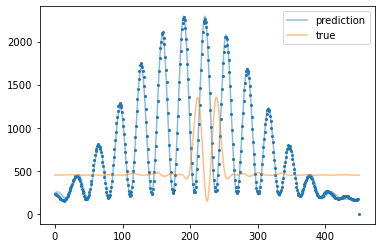

32.164416166320486


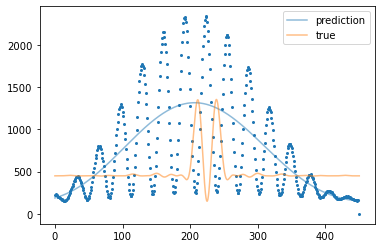

335.4080047841006


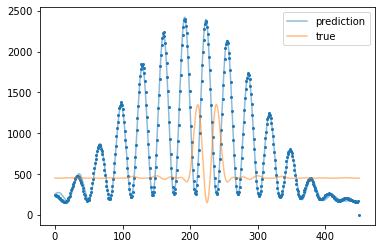

31.27781999391248


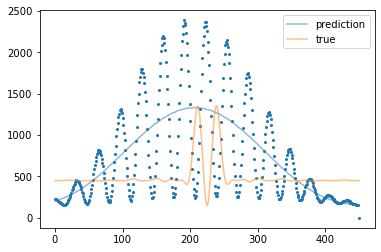

340.6091882579476


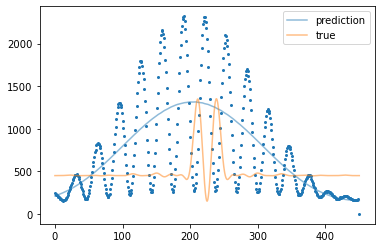

330.1432513644071


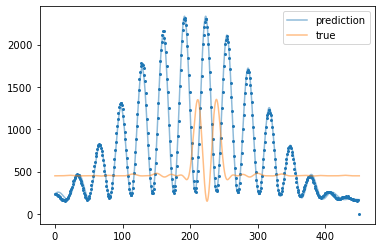

33.425652716637195


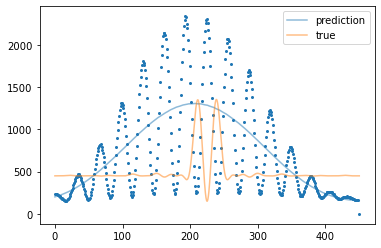

333.3271962592409


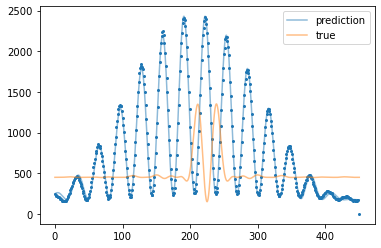

33.8510107629323


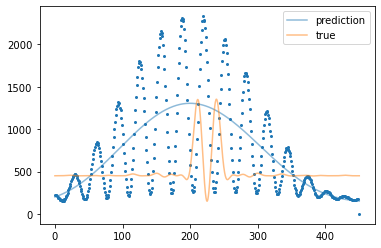

330.5321828678595


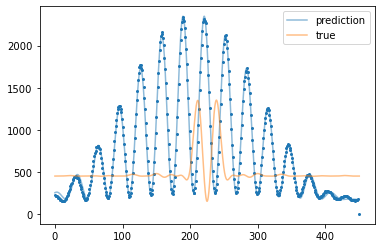

31.903955815753886


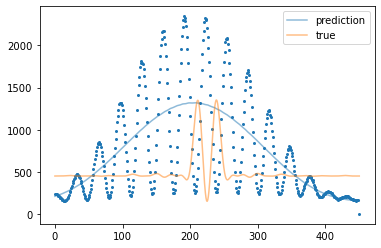

335.7584930318999


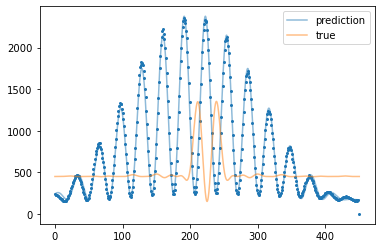

36.111001384063194


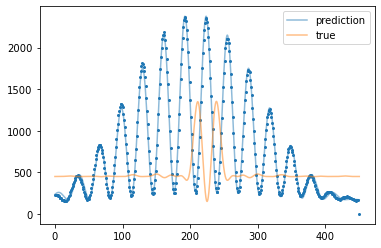

32.66156185646168


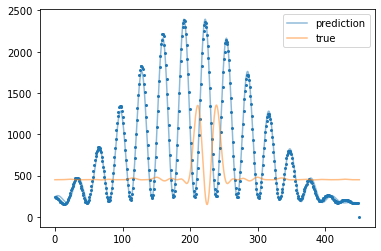

36.536993326508714


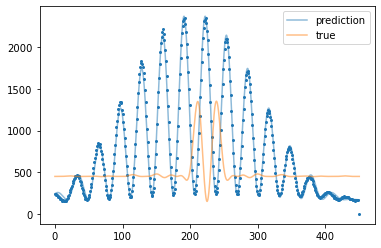

35.94216488461823


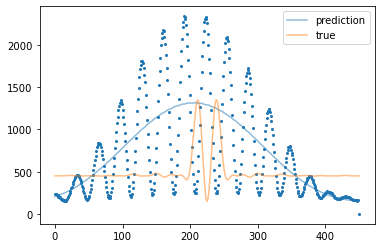

338.80530155030146


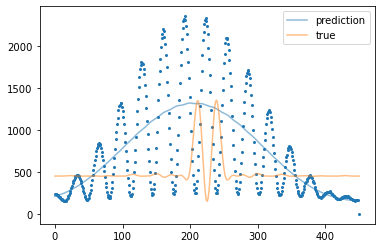

338.12482746206575


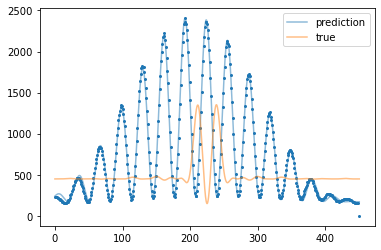

31.9320126890142


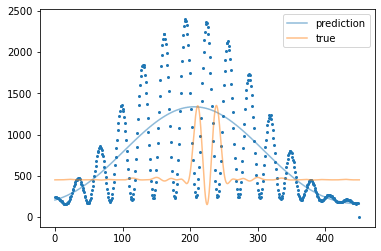

345.3716467591847


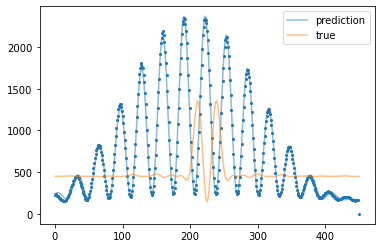

33.38221320020839


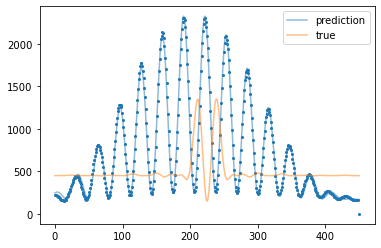

32.04489896674649


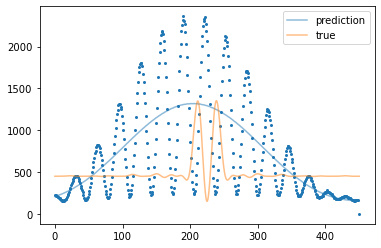

338.7064090592533


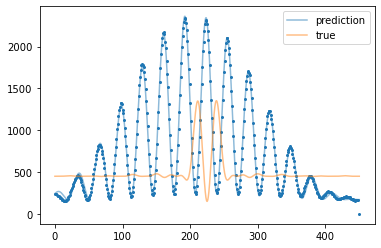

31.06627071071813


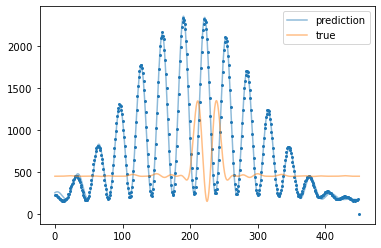

30.97014570899775


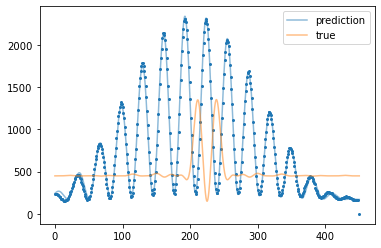

30.493382295159527


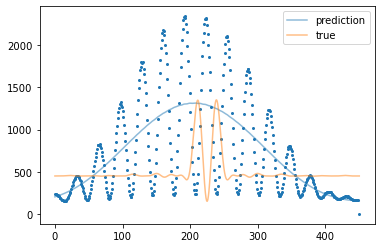

339.70321808154125


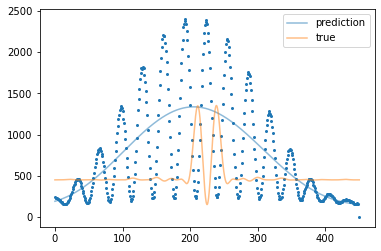

347.36161268810054


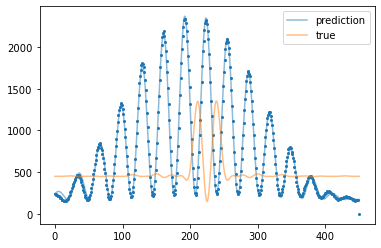

31.77703327869496


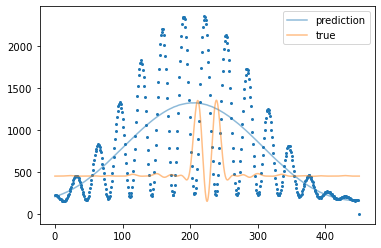

342.2020414067374


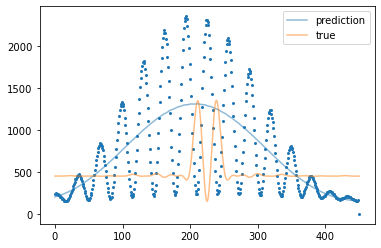

339.6383275139289


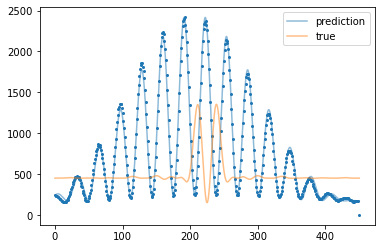

38.240416639822804


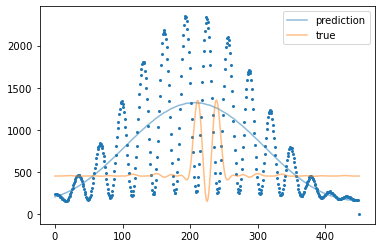

336.46125980805505


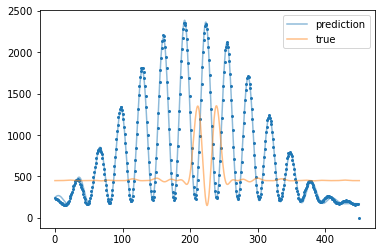

31.905047963538596


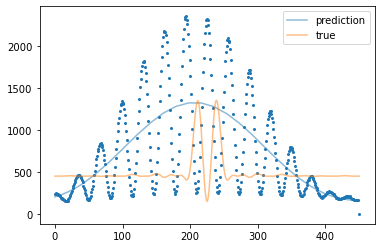

338.14800093508535


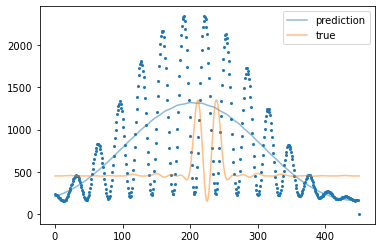

340.7242032373098


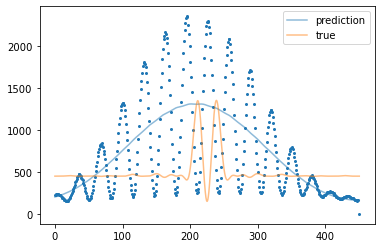

336.64786002274326


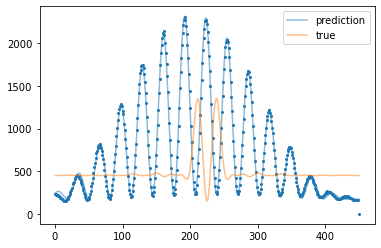

31.152970629316112


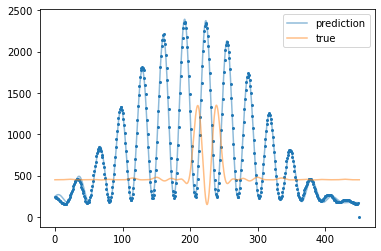

31.944729309894203


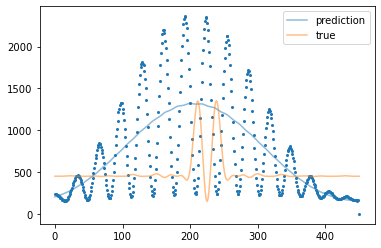

341.4683325313562


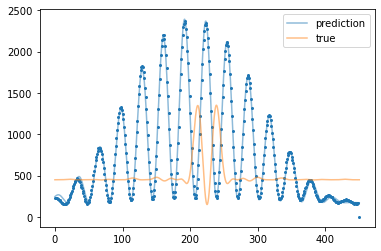

31.531305166246465


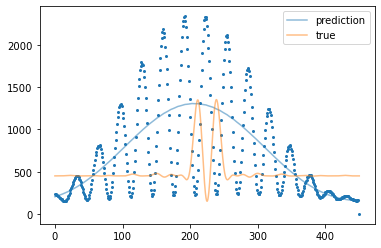

339.46344959406014


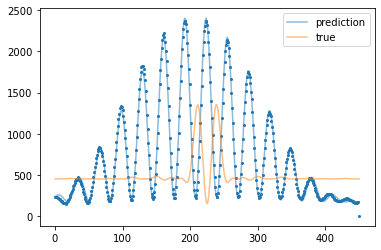

34.87501117249869


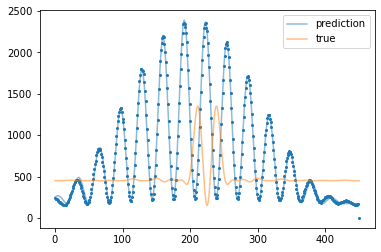

31.077458693652734


In [11]:
"""
Check if these x0_pred parameters work for all datapoints as good 
"""

x0_pred=ds_para(intensity=1000,
                sx=0.07,
                x0=225,
                offset=450,
                a2=1.6,
                a3=0.2,
                phase=3.15)

for i in range(100):
    Regressor = ds.double_slit_reg(x0_pred=x0_pred)
    y=data.tms_diag_y_projection[i,:]
    Regressor.fit(x,y)
    Regressor.plot_result(x,y,true_input=x0_pred)
    plt.show()
    print(np.mean(np.abs(Regressor.predict(x)-np.array(y))))

We see that in alot of cases the prediction is wrong.

How will the prediction look like, if we take as x0 a parameter, that perfectly fits one datapoint?

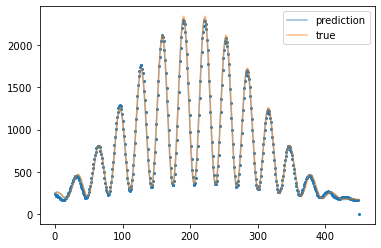

0 29.37339474848123


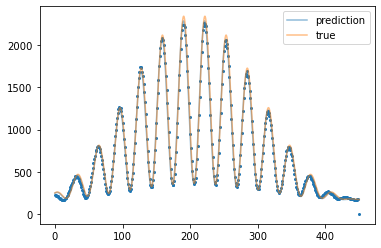

1 29.288646226062887


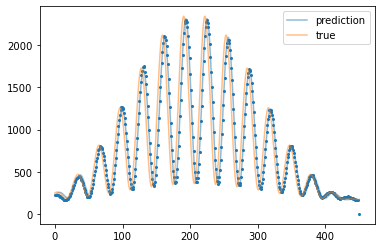

2 28.795714177506504


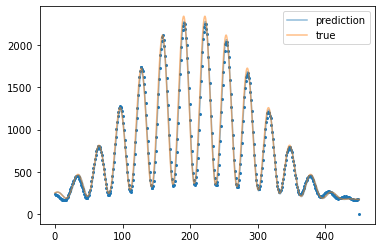

3 29.795777811546976


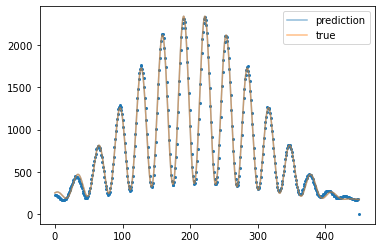

4 28.514462911803378


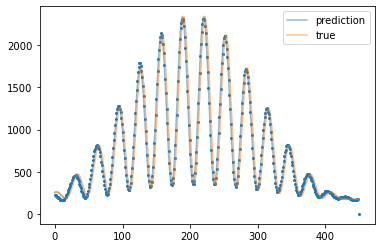

5 29.349525539735552


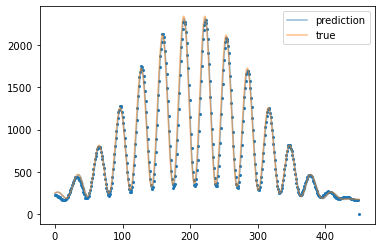

6 29.077027111876653


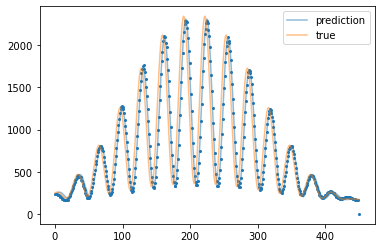

7 29.702537246666587


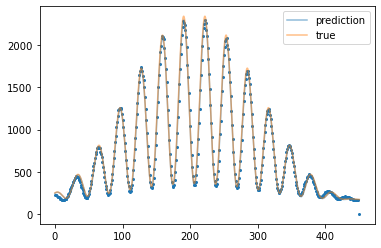

8 28.831923349838114


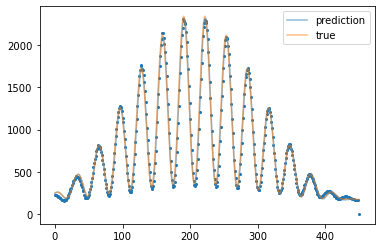

9 29.82268611560085


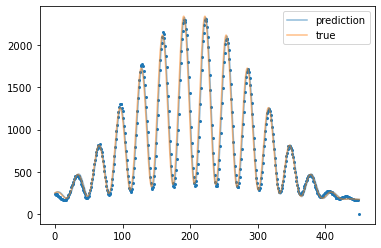

10 31.210340298612046


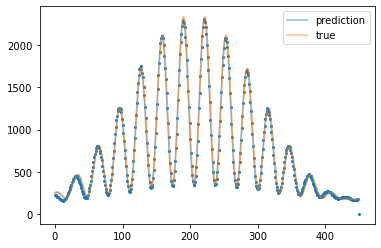

11 29.087991558482916


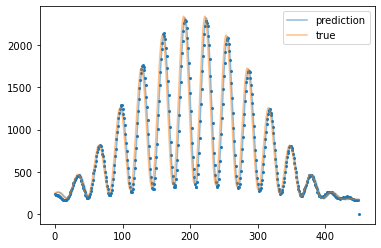

12 30.20877355828553


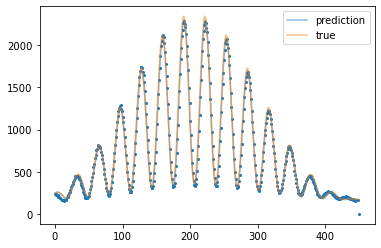

13 29.730225842133038


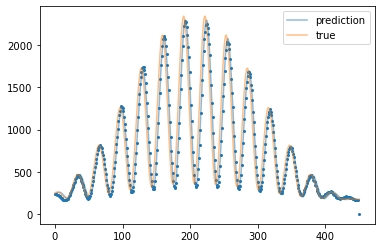

14 31.01917054346107


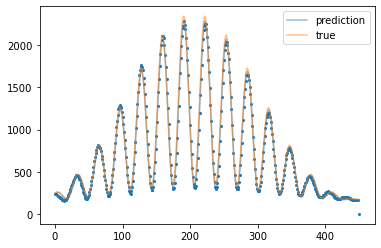

15 32.50609968294008


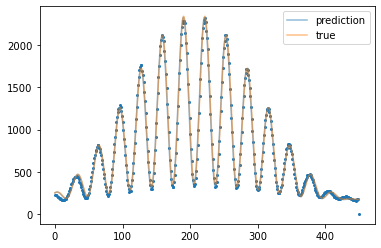

16 29.31653530585589


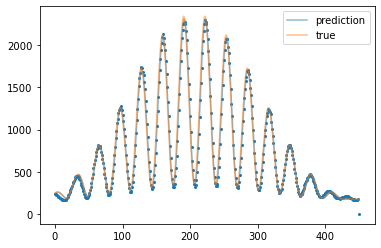

17 29.181624102734027


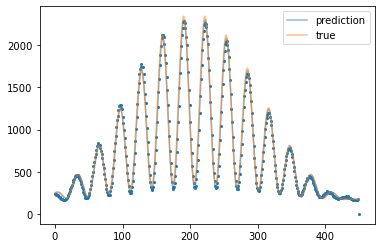

18 32.7915634812794


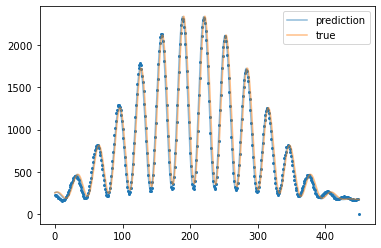

19 30.65191210586264


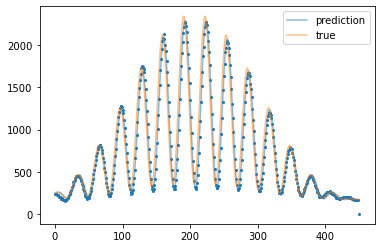

20 31.892692040130374


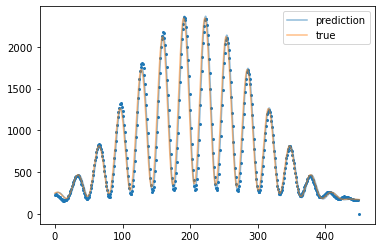

21 32.66049775837399


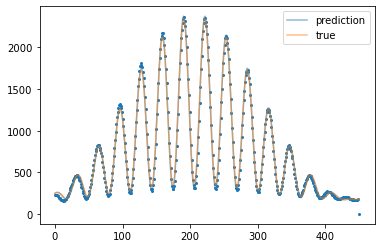

22 31.140002696619852


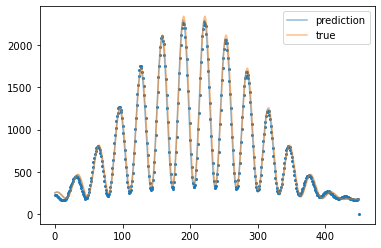

23 30.185638259975665


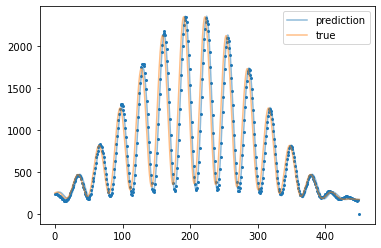

24 33.25653626223319


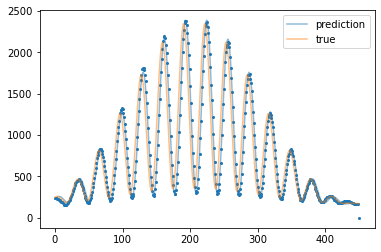

25 32.723816855646675


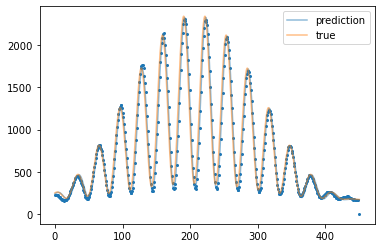

26 30.37409193558177


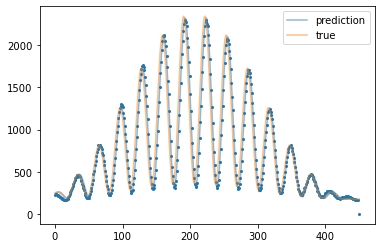

27 30.661054712549042


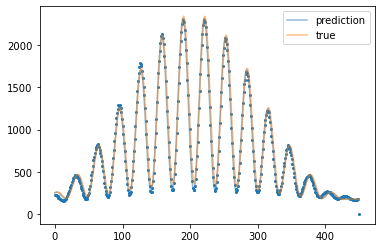

28 32.64079533819346


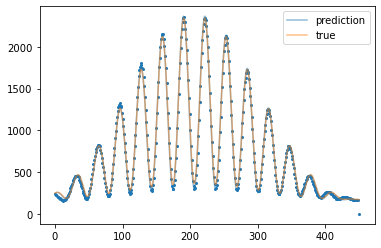

29 31.628541127874822


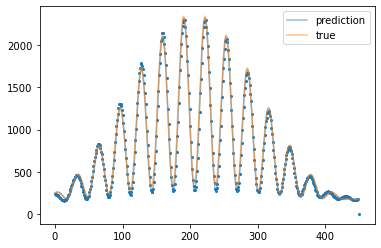

30 33.47310842027349


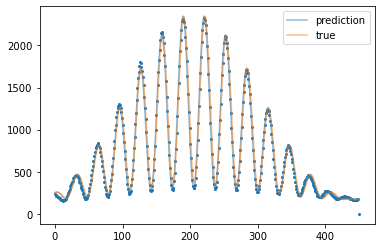

31 31.7794328086308


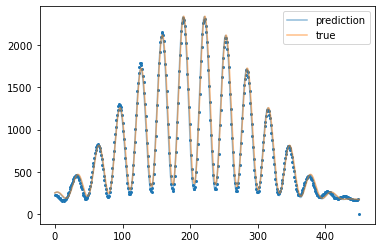

32 32.13963969080895


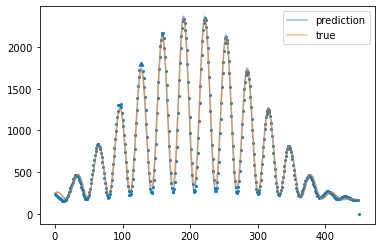

33 33.13077320512291


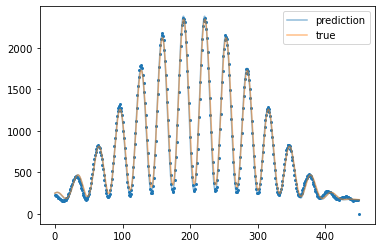

34 31.25596688877197


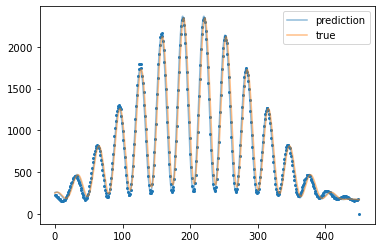

35 31.785925755371622


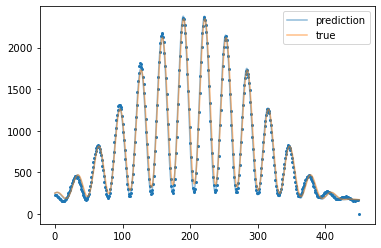

36 32.03197009280341


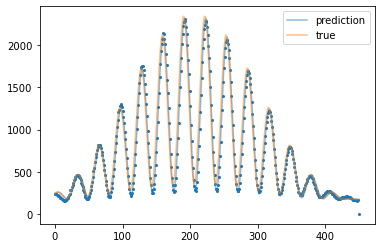

37 33.03011441185603


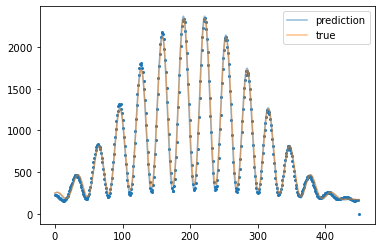

38 32.938068324825466


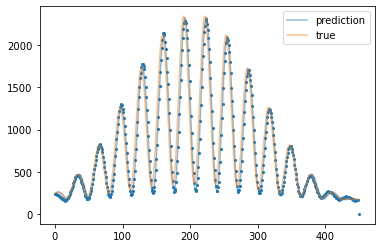

39 32.621318483668645


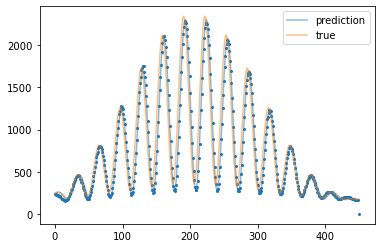

40 31.706209262753465


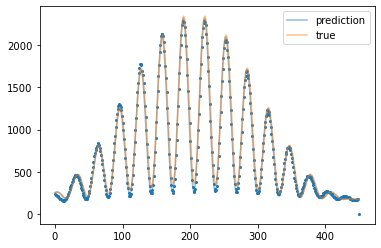

41 34.12067387111912


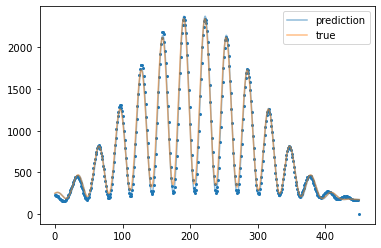

42 32.1000914632308


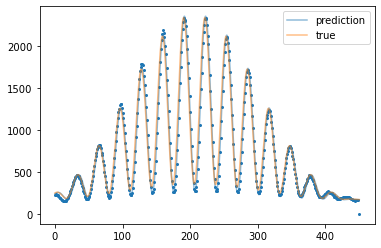

43 32.93169066340087


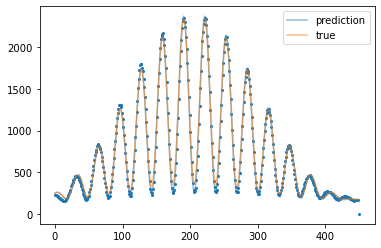

44 32.62428223182846


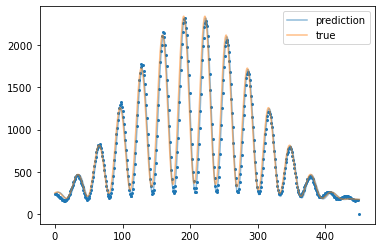

45 34.19524309229302


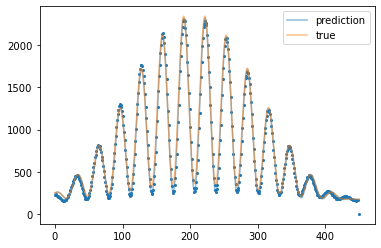

46 32.764949682672466


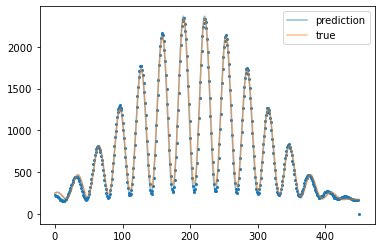

47 30.931916459108752


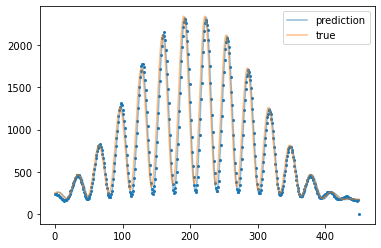

48 32.66182417860095


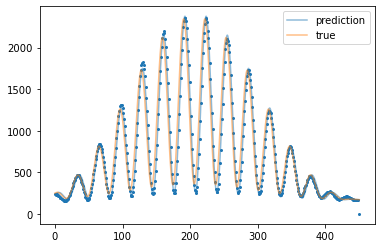

49 34.6397827568226


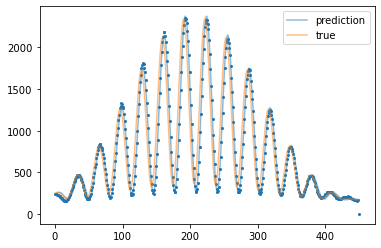

50 33.86275316216055


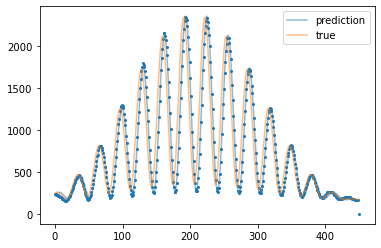

51 31.980791904559947


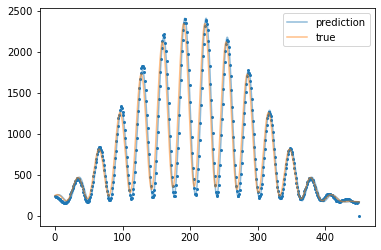

52 33.54437513654626


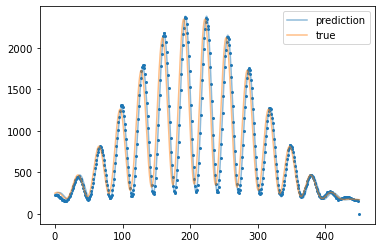

53 31.412116524108967


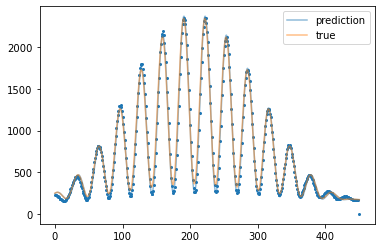

54 31.518058702354438


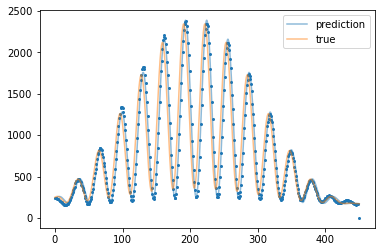

55 36.140432977271786


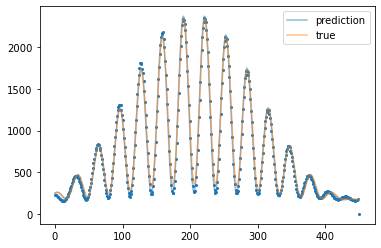

56 33.61927581536766


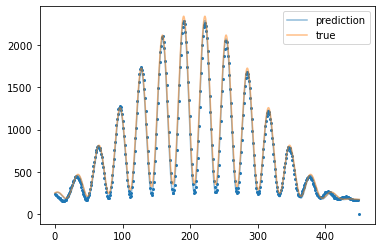

57 32.164416374023894


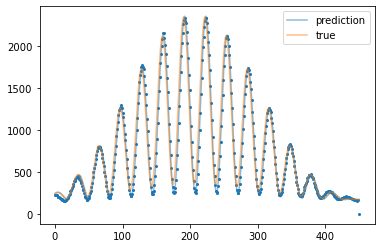

58 31.058116838220496


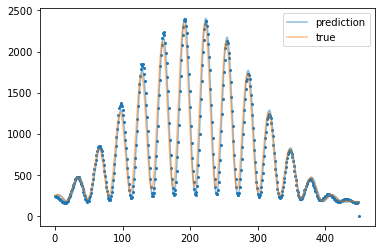

59 36.99917807273677


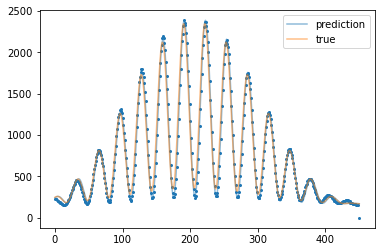

60 32.150797930109604


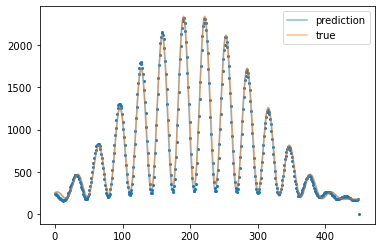

61 33.73867055233188


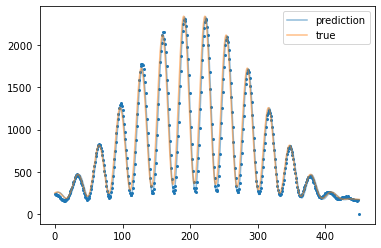

62 33.42564910934949


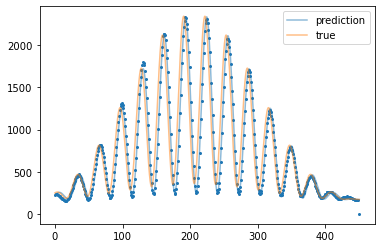

63 34.79222104932837


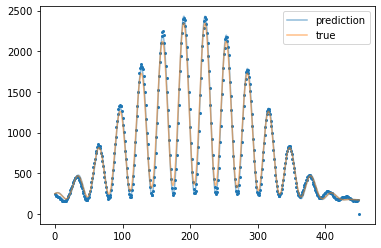

64 33.851011084955765


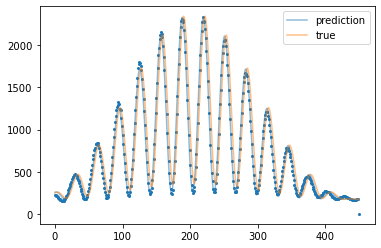

65 35.79749496215907


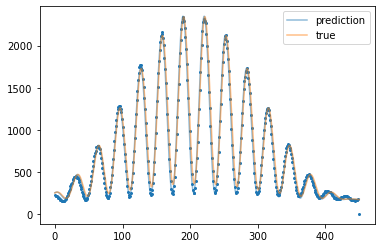

66 31.90395588137685


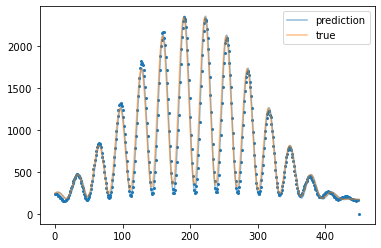

67 35.6674205582982


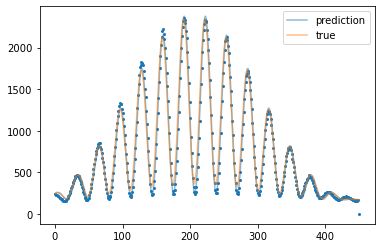

68 36.1110005516848


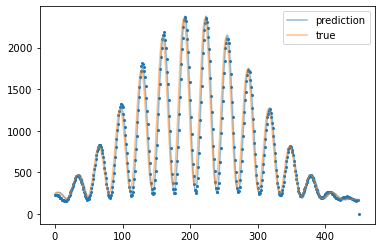

69 32.66157965898253


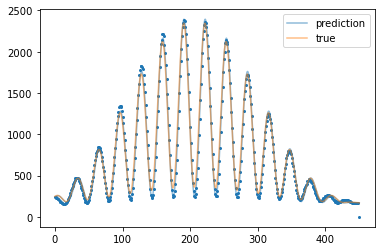

70 36.53699393195246


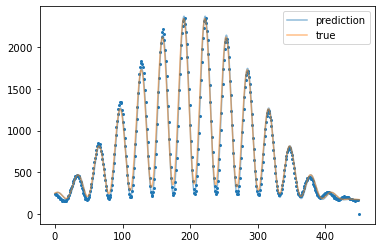

71 35.94216527375626


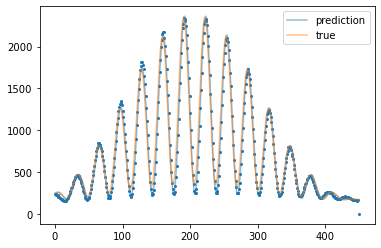

72 35.06845864601248


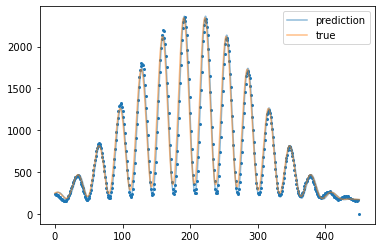

73 35.22842007798389


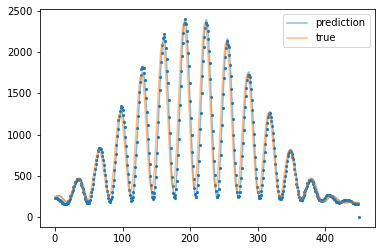

74 35.37537534294734


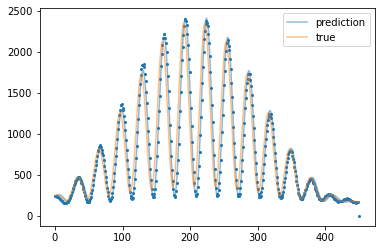

75 37.510700452059126


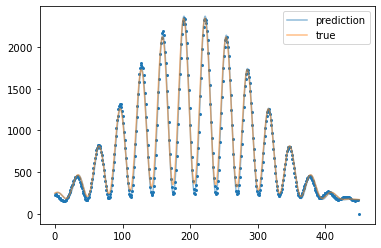

76 33.38221763920823


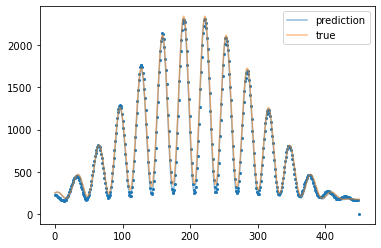

77 32.04489930896818


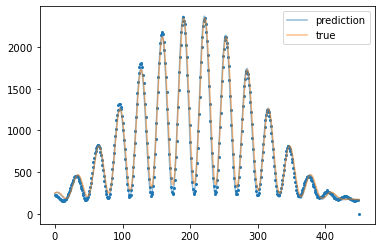

78 34.10650777824206


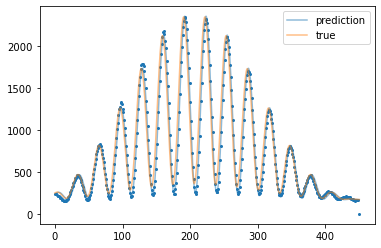

79 34.12276670591333


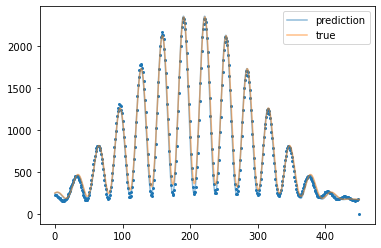

80 33.12610213665156


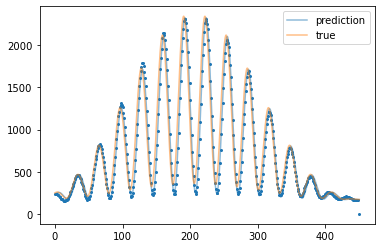

81 34.86036441213649


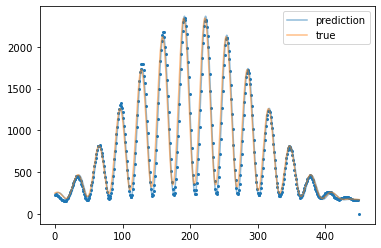

82 33.93119471957059


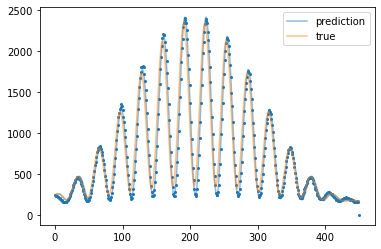

83 34.35473196593264


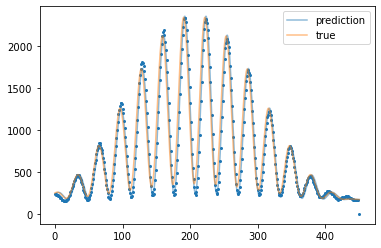

84 35.587313698569545


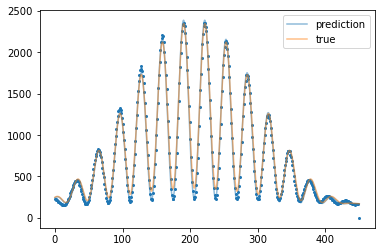

85 34.10889725998206


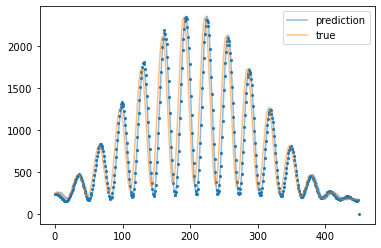

86 35.94885008758838


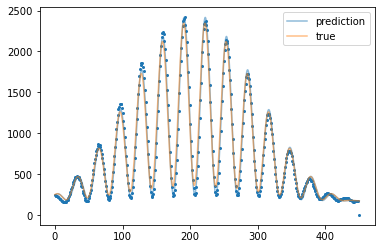

87 38.240415938546505


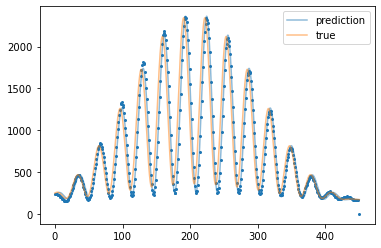

88 34.83528799327437


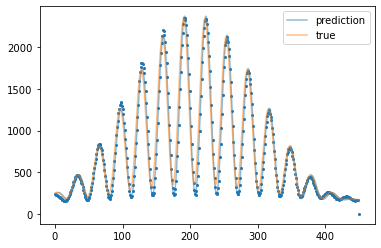

89 35.93455016748822


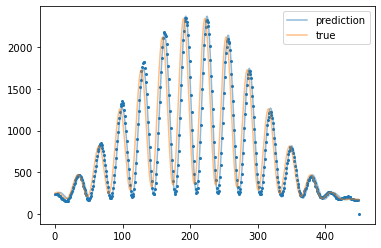

90 36.57624956800779


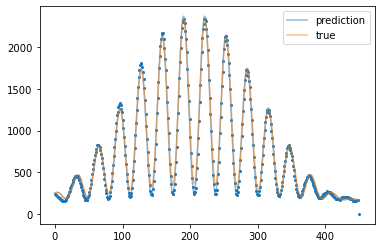

91 33.71150805253841


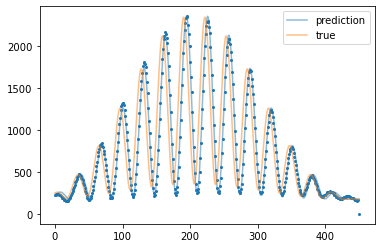

92 36.37626193305385


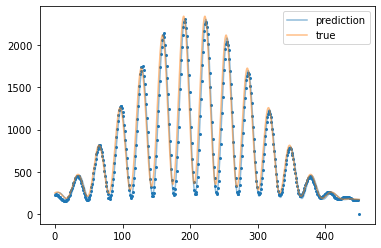

93 33.760630274549946


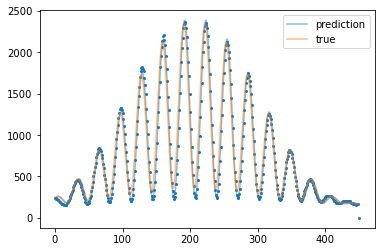

94 34.56406193103227


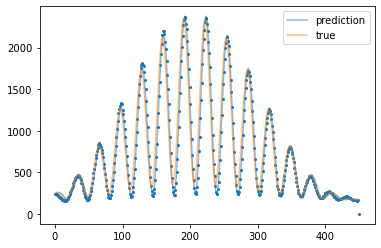

95 35.41249668825623


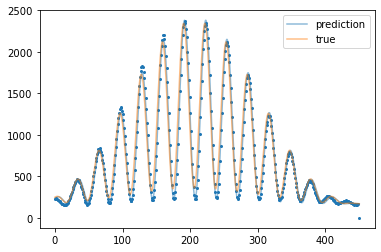

96 35.91239094137382


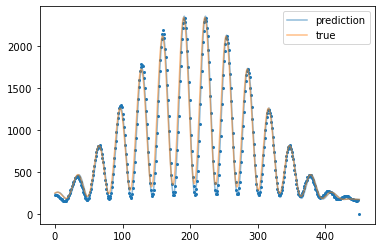

97 33.15309550176339


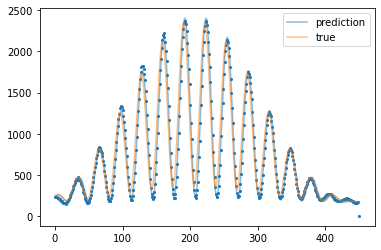

98 34.87501184082146


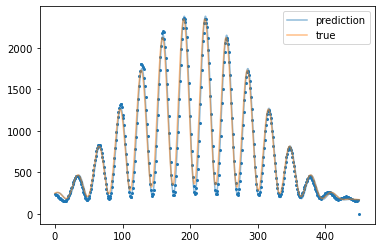

99 34.91131773995269


In [12]:
x0_pred=exact_paras
for i in range(100):
    Regressor = ds.double_slit_reg(x0_pred=x0_pred)
    y=data.tms_diag_y_projection[i,:]
    Regressor.fit(x,y)

    Regressor.plot_result(x,y,true_input=x0_pred)
    plt.show()
    print(i,np.mean(np.abs(Regressor.predict(x)-np.array(y))))

In [13]:
x0_pred=exact_paras
mean_error_sum=0
for i in range(7803):
    if i!=0 and i%1000==0:
        print(i)
    Regressor = ds.double_slit_reg(x0_pred=x0_pred)
    y=data.tms_diag_y_projection[i,:]
    Regressor.fit(x,y)
    
    mean_error_sum+=np.mean(np.abs(Regressor.predict(x)-np.array(y)))
    
    if np.mean(np.abs(Regressor.predict(x)-np.array(y)))>80:
        print("Error at ",i,np.mean(np.abs(Regressor.predict(x)-np.array(y))))
print("MEAN ABSOLUTE ERROR: ",mean_error_sum/7803)

1000
2000
3000
4000
Error at  4646 141.6754770358156
Error at  4654 142.81558700192136
Error at  4666 140.41234530134054
Error at  4684 142.94334987861382
Error at  4686 141.10151386043887
Error at  4694 143.60531116972757
Error at  4695 140.52088032292212
Error at  4698 144.60454138327103
Error at  4709 141.39459286256044
Error at  4721 146.0566081441856
Error at  4724 149.23128693195002
Error at  4736 138.83086080769314
Error at  4743 146.91464547216503
Error at  4746 146.68238136879893
Error at  4750 145.6415866401256
Error at  4754 144.77797072805296
Error at  4759 143.0748831009219
Error at  4763 143.7011372829789
Error at  4776 327.8699691635231
Error at  4778 142.5709524931053
Error at  4783 142.70179673245102
Error at  4792 142.79593676042575
Error at  4793 144.6959708758817
Error at  4795 140.28332024272194
Error at  4796 139.10664652877517
Error at  4810 145.12790616453566
Error at  4812 144.5948971788404
Error at  4814 143.57452094892693
Error at  4824 147.5775011485699
Erro

Now, only few wrong plots occured. How can we get better?

Wir bemerken, dass zwischen diesen Fehlermeldungen mehrere Parameter richtig bestimmt werden. Was passiert wenn wir 
1. Anderer x0 Wert, z.b. den bei 5100
2. Als x0 immer das von den Daten davor predictete x0 nehmen?

# 1 #

In [14]:
x0_pred=exact_paras
mean_error_sum=0

Regressor = ds.double_slit_reg(x0_pred=x0_pred)

x=np.arange(450)
y=data.tms_diag_y_projection[5100,:]
Regressor.fit(x,y)
new_paras = Regressor.x

x0_pred=new_paras
for i in range(7803):
    if i!=0 and i%1000==0:
        print(i)
    Regressor = ds.double_slit_reg(x0_pred=x0_pred)
    y=data.tms_diag_y_projection[i,:]
    Regressor.fit(x,y)
    
    mean_error_sum+=np.mean(np.abs(Regressor.predict(x)-np.array(y)))
    
    if np.mean(np.abs(Regressor.predict(x)-np.array(y)))>80:
        print("Error at ",i,np.mean(np.abs(Regressor.predict(x)-np.array(y))))
print("MEAN ABSOLUTE ERROR: ",mean_error_sum/7803)

Error at  577 326.30230475989123
Error at  655 331.0340017420806
1000
Error at  1136 340.1569023950418
Error at  1797 340.1885616749425
2000
Error at  2680 327.1499734088182
Error at  2723 334.49593371155635
Error at  2825 334.7030243381551
3000
Error at  3074 330.4007374523646
Error at  3827 322.0674662675598
4000
Error at  4152 318.2383820695091
Error at  4429 325.89165102941683
5000
Error at  5961 322.739895371041
6000
Error at  6077 302.2523781185097
Error at  6124 318.09583953916484
Error at  6162 305.95451590940746
Error at  6320 319.29432079184375
Error at  6354 312.4988508905257
Error at  6465 303.9374585632189
Error at  6474 318.3202471061681
Error at  6489 313.3294282709812
Error at  6598 316.4237649434813
Error at  6684 313.74249894645504
Error at  6685 311.71429555222556
Error at  6723 314.14152325597775
Error at  6727 315.1925911142053
Error at  6916 309.5834424878944
Error at  6943 310.20693253575644
Error at  6958 302.9318298980965
7000
Error at  7011 306.05422883605263


# 2 #

In [10]:
Regressor = ds.double_slit_reg(x0_pred=x0_pred)
mean_error_sum=0

parameters=np.zeros((7803,7))
error_array=np.zeros((7803,))

x=np.arange(450)
y=data.tms_diag_y_projection[4,:]
Regressor.fit(x,y)

for i in range(7803):
    parameters[i,:]=Regressor.x.to_array()

    if i!=0 and i%1000==0:
        print(i)
        
    x0_pred=Regressor.x
    Regressor = ds.double_slit_reg(x0_pred=x0_pred)
    y=data.tms_diag_y_projection[i,:]
    Regressor.fit(x,y)
    
    error_array[i]=np.mean(np.abs(Regressor.predict(x)-np.array(y)))
    
    mean_error_sum+=np.mean(np.abs(Regressor.predict(x)-np.array(y)))

    if np.mean(np.abs(Regressor.predict(x)-np.array(y)))>80:
        print("Error at ",i,np.mean(np.abs(Regressor.predict(x)-np.array(y))))
print("MEAN ABSOLUTE ERROR: ",mean_error_sum/7803)

1000
2000
3000
4000
5000
6000
7000
MEAN ABSOLUTE ERROR:  31.670158510548188


FEHLT NOCH: Was tun wenn eine Prediciton nicht gut war

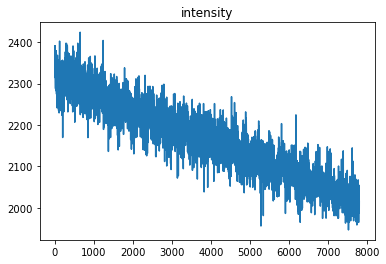

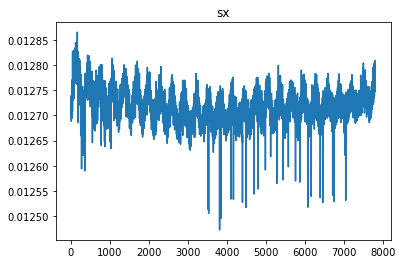

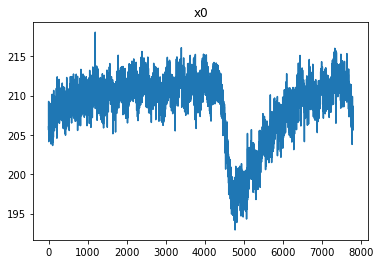

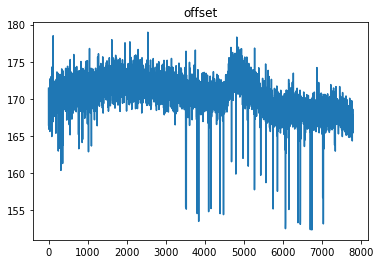

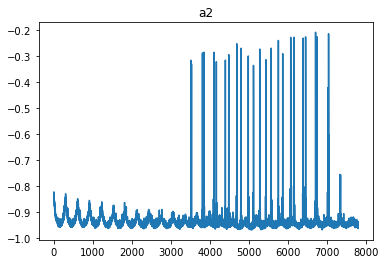

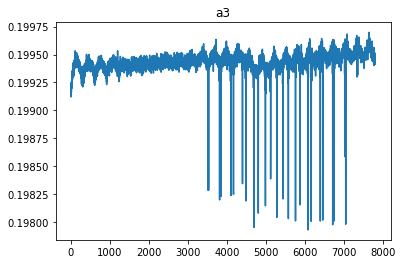

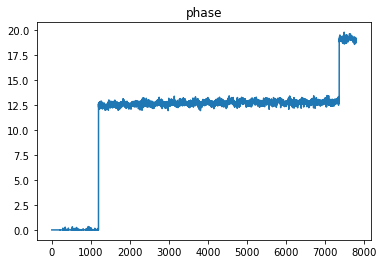

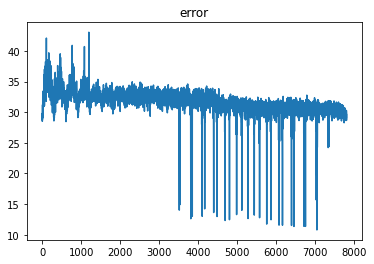

In [11]:
label_list=["intensity", "sx", "x0", "offset", "a2", "a3", "phase"]
for i in range(7):
    x=np.arange(7803)
    plt.plot(x,parameters[:,i])
    plt.title(label_list[i])
    plt.show()
plt.plot(x,error_array)
plt.title("error")
plt.show()


In [12]:
np.where(error_array<20)

(array([3513, 3514, 3515, 3528, 3529, 3530, 3808, 3809, 3810, 3848, 4102,
        4103, 4164, 4165, 4166, 4397, 4482, 4483, 4484, 4689, 4690, 4691,
        4800, 4801, 4802, 4984, 4985, 5118, 5119, 5120, 5278, 5279, 5437,
        5438, 5573, 5755, 5756, 5866, 5867, 6072, 6073, 6074, 6160, 6161,
        6391, 6392, 6453, 6454, 6455, 6456, 6709, 6710, 6747, 6748, 6749,
        7026, 7027, 7038, 7042, 7043, 7044], dtype=int64),)

In [16]:
x0_pred=exact_paras
mean_error_sum=0

Regressor = ds.double_slit_reg(x0_pred=x0_pred)

x=np.arange(450)
y=data.tms_diag_y_projection[3513,:]
Regressor.fit(x,y)
x0_pred = Regressor.x
print(np.mean(np.abs(Regressor.predict(x)-np.array(y))))

Regressor = ds.double_slit_reg(x0_pred=x0_pred)
mean_error_sum=0

parameters=np.zeros((7803,7))
error_array=np.zeros((7803,))

x=np.arange(450)
y=data.tms_diag_y_projection[4,:]
Regressor.fit(x,y)

for i in range(7803):
    parameters[i,:]=Regressor.x.to_array()

    if i!=0 and i%1000==0:
        print(i)
        
    Regressor = ds.double_slit_reg(x0_pred=x0_pred)
    y=data.tms_diag_y_projection[i,:]
    Regressor.fit(x,y)
    
    error_array[i]=np.mean(np.abs(Regressor.predict(x)-np.array(y)))
    
    mean_error_sum+=np.mean(np.abs(Regressor.predict(x)-np.array(y)))

    if np.mean(np.abs(Regressor.predict(x)-np.array(y)))>80:
        print("Error at ",i,np.mean(np.abs(Regressor.predict(x)-np.array(y))))
print("MEAN ABSOLUTE ERROR: ",mean_error_sum/7803)

15.081494337378341
1000
2000
3000
4000
Error at  4598 321.81333600968975
Error at  4604 315.8999480003005
Error at  4610 334.10705227320096
Error at  4620 320.46936931883084
Error at  4623 323.4526954072258
Error at  4624 320.27025869332857
Error at  4630 328.7186896673863
Error at  4632 327.1807649123489
Error at  4640 328.3534556822841
Error at  4645 83.17167818318882
Error at  4647 321.6207655946218
Error at  4651 325.596927481493
Error at  4653 326.4259399437968
Error at  4656 328.2666230942653
Error at  4657 323.3233438583455
Error at  4676 322.59114024247816
Error at  4680 324.21502592103826
Error at  4682 330.46627752878
Error at  4685 82.79782102251212
Error at  4703 80.85267507322177
Error at  4711 329.3505663354679
Error at  4712 82.535724309007
Error at  4716 81.81929624519671
Error at  4719 327.6548379444536
Error at  4724 82.3331692135018
Error at  4732 80.03196957728765
Error at  4743 80.36105778237682
Error at  4746 80.9761646771247
Error at  4761 323.0720081545244
Error

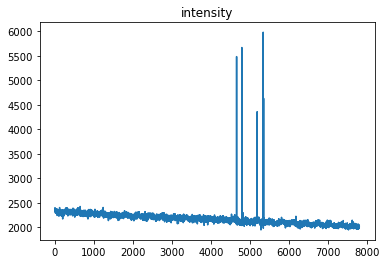

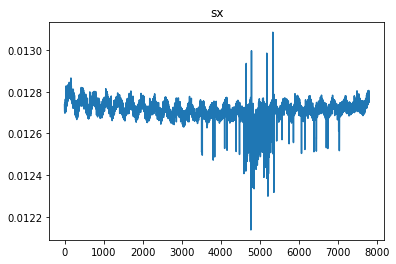

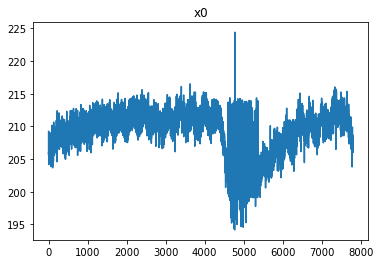

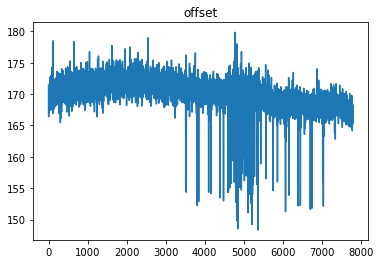

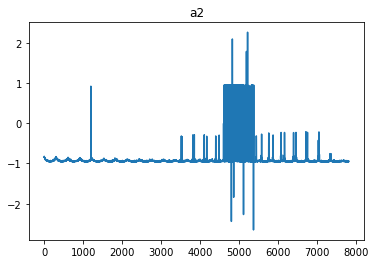

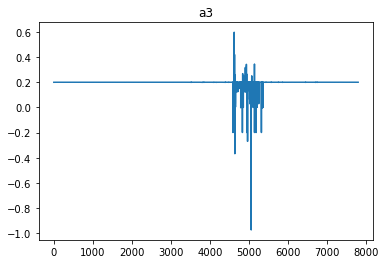

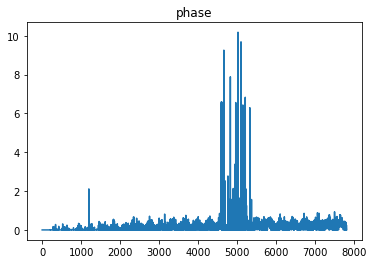

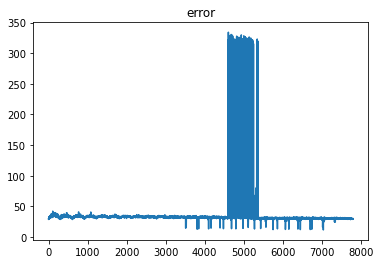

In [17]:
label_list=["intensity", "sx", "x0", "offset", "a2", "a3", "phase"]
for i in range(7):
    x=np.arange(7803)
    plt.plot(x,parameters[:,i])
    plt.title(label_list[i])
    plt.show()
plt.plot(x,error_array)
plt.title("error")
plt.show()


In [14]:
import pandas as pd
print(pd.DataFrame(parameters).corr())

          0         1         2         3         4         5         6
0  1.000000  0.139386  0.174497  0.391163  0.075470 -0.215689 -0.686894
1  0.139386  1.000000 -0.096168  0.221540 -0.485642  0.288444 -0.278890
2  0.174497 -0.096168  1.000000 -0.102329 -0.022143  0.263617  0.000591
3  0.391163  0.221540 -0.102329  1.000000 -0.510564  0.284988 -0.126728
4  0.075470 -0.485642 -0.022143 -0.510564  1.000000 -0.873765 -0.071412
5 -0.215689  0.288444  0.263617  0.284988 -0.873765  1.000000  0.215343
6 -0.686894 -0.278890  0.000591 -0.126728 -0.071412  0.215343  1.000000


141.39459286256044


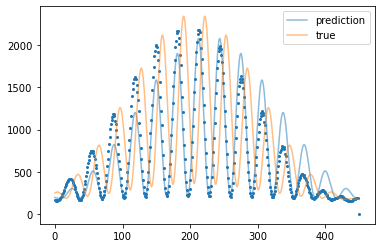

In [10]:
x0_pred=exact_paras
mean_error_sum=0

Regressor = ds.double_slit_reg(x0_pred=x0_pred)

x=np.arange(450)
y=data.tms_diag_y_projection[4709,:]
Regressor.fit(x,y)
print(np.mean(np.abs(Regressor.predict(x)-np.array(y))))
Regressor.plot_result(x,y,true_input=x0_pred)
plt.show()

## Regression with Gaussian Processes ##

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Kernel, Hyperparameter
from sklearn.gaussian_process.kernels import GenericKernelMixin
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.base import clone

import double_slit as ds


class DSKernel(GenericKernelMixin, Kernel):
    """
    A minimal (but valid) convolutional kernel for sequences of variable
    lengths."""

    def __init__(self, intensity=1000, intensity_bounds=(0, np.inf),
                       xs=0.07       , xs_bounds=(0,np.inf),
                       x0=225        , x0_bounds=(-np.inf,np.inf),
                       y0=450        , y0_bounds=(-np.inf,np.inf),
                       a2=1.6        , a2_bounds=(-np.inf,np.inf),
                       a3=0.2        , a3_bounds=(-np.inf,np.inf),
                       phase=3.15    , phase_bounds=(0,np.inf)
                ):
    
        self.intensity = intensity
        self.intensity_bounds = intensity_bounds
        self.xs = xs
        self.xs_bounds = xs_bounds
        self.x0 = x0
        self.x0_bounds = x0_bounds
        self.y0 = y0
        self.y0_bounds = y0_bounds
        self.a2 = a2
        self.a2_bounds = a2_bounds
        self.a3 = a3
        self.a3_bounds = a3_bounds
        self.phase = phase
        self.phase_bounds = phase_bounds
        
    @property
    def hyperparameter_intensity(self):
        return Hyperparameter(
            "intensity", "numeric", self.intensity_bounds
        )
    @property
    def hyperparameter_xs(self):
        return Hyperparameter(
            "xs", "numeric", self.xs_bounds
        )
    @property
    def hyperparameter_x0(self):
        return Hyperparameter(
            "x0", "numeric", self.x0_bounds
        )
    @property
    def hyperparameter_y0(self):
        return Hyperparameter(
            "y0", "numeric", self.y0_bounds
        )
    @property
    def hyperparameter_a2(self):
        return Hyperparameter(
            "a2", "numeric", self.a2_bounds
        )
    @property
    def hyperparameter_a3(self):
        return Hyperparameter(
            "a3", "numeric", self.a3_bounds
        )
    @property
    def hyperparameter_phase(self):
        return Hyperparameter(
            "phase", "numeric", self.phase_bounds
        )

    def _f(self, s1, s2):
        """
        kernel value between a pair of sequences
        """
        return ds.double_slit(s1, intensity=self.intensity, sx=self.xs, x0=self.x0, offset=self.y0, 
                              a2=self.a2, a3=self.a3, phase=self.phase)*\
               ds.double_slit(s2, intensity=self.intensity, sx=self.xs, x0=self.x0, offset=self.y0, 
                              a2=self.a2, a3=self.a3, phase=self.phase)

    def _g(self, s1, s2):
        """
        kernel derivative between a pair of sequences
        
        return sum([0.0 if c1 == c2 else 1.0 for c1 in s1 for c2 in s2])
        """
        pass
    
    def __call__(self, X, Y=None, eval_gradient=False):
        if Y is None:
            Y = X

        if eval_gradient:
            raise Exception("eval_gradient ist auf True? Ableitung noch nicht implementiert")
        else:
            return np.array([[self._f(x, y) for y in Y] for x in X])

    def diag(self, X):
        return np.array([self._f(x, x) for x in X])

    def is_stationary(self):
        return False

    def clone_with_theta(self, theta):
        cloned = clone(self)
        cloned.theta = theta
        return cloned


kernel = DSKernel()

In [14]:
"""
Regression
==========
"""

X=np.arange(450)
Y=data.tms_diag_y_projection[4,:]


gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,Y)

z = np.linspace(0, 450, num=10*600+1)
plt.scatter(X, Y, label="training")
plt.plot(z, gp.predict(z), label="prediction")

plt.title("Regression using Gaussian processes")
plt.legend()


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:301: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:301: RuntimeWarning: invalid value encountered in log
  return np.log(np.vstack(bounds))


Exception: eval_gradient ist auf True? Ableitung noch nicht implementiert